# Rekursive Funktionen in Python  
Begleitbuch DPA Seite 162  

Es mag ein wenig überraschen, aber eine Funktion kann sich selbst aufrufen. Das Ver-
fahren wird als Rekursion bezeichnet. Sinnvoll ist es immer dann, wenn ineinander
verschachtelte Probleme gelöst werden sollen, also wenn sich eine Aufgabe in Teil-
aufgaben unterteilen lässt. Bei nichtrekursiven Verfahren mit den bereits behandel-
ten Schleifen wird übrigens von Iteration gesprochen.
Wichtig ist bei der Rekursion, dass es eine Abbruchbedingung gibt: Da das Programm
sich bei einem Funktionsaufruf merken muss, an welcher Stelle die Funktion aufge-
rufen wurde, um nach der Ausführung dorthin zurückzukehren (auf einer maschi-
nennäheren Ebene spricht man von einer Rücksprungadresse), wird der Speicher
ansonsten überfüllt, und das Programm stürzt ab. In einer Hochsprache wie Python
wird der Fall allerdings rechtzeitig abgefangen und endet mit einer Fehlermeldung.
Das folgende Beispiel berechnet die Fakultät eines Wertes n, indem der jeweils ak-
tuelle Wert mit der Fakultät von n - 1 multipliziert wird. Als Abbruchbedingung dient
der Ausdruck n <= 1, denn an der Stelle ist die Fakultät fertig berechnet:

In [1]:
def factorial(n):
    print(n)
    # Abbruchbedingung
    if n <= 1:
        print('Zurück', n) 
        return 1
    # Rekursionsbedingung
    return n * factorial(n - 1)

In [2]:
factorial(5)

5
4
3
2
1
Zurück 1


120

In [3]:
def Fakultät(n):
    if n == 1:
        return 1
    else:
        return n * Fakultät(n-1)
    
print(Fakultät(5))

120


Bei dem Einsatz von Rekursion immer darauf achten, dass es eine Abbruchbedingung gibt!  
Sonst erhalten Sie eine Endlosschleife, die nur durch einen Kernel Neustart unterbrochen werden kann.  
**Tip:** Beim Erstellen einer Rekursiven Funktion sollten Sie diese als erstes erstellen.

## Verlauf der Rekursion

In [4]:
def Fakultät(n):
    print(f"Fakultät wurde mit {n} aufgerufen")
    if n == 1:
        return 1
    else:
        res = n * Fakultät(n-1)
        print("Zwischenergebnis für ", n, "* Fakultät (" , n - 1, "): ", res)
        return res
### MAIN ###
print(Fakultät(5))

Fakultät wurde mit 5 aufgerufen
Fakultät wurde mit 4 aufgerufen
Fakultät wurde mit 3 aufgerufen
Fakultät wurde mit 2 aufgerufen
Fakultät wurde mit 1 aufgerufen
Zwischenergebnis für  2 * Fakultät ( 1 ):  2
Zwischenergebnis für  3 * Fakultät ( 2 ):  6
Zwischenergebnis für  4 * Fakultät ( 3 ):  24
Zwischenergebnis für  5 * Fakultät ( 4 ):  120
120


In [ ]:
def iterative_Fakultät(n):
    Ergebnis = 1  # 1 * 2 * 3 * 4 * 5
    for i in range(2, n+1):
        Ergebnis *= i   # Ergebnis = Ergebnis * i
    return Ergebnis
#for i in range(6):
#    print(i, iterative_Fakultät(i))
iterative_Fakultät(5)

In [ ]:
def Fakultät(n):
    if n == 1:
        return 1
    else:
        print(n)
        return n * Fakultät(n-1)
    
print(Fakultät(5))

In [ ]:
def sum_n(n):
    if n== 0:
        return 0
    else:
        return n + sum_n(n-1)
sum_n(5)

# Die Fibonacci-Folge
Die Fibonacci-Folge ist die unendliche Folge natürlicher Zahlen, die (ursprünglich) mit zweimal der Zahl 1 beginnt oder (häufig, in moderner Schreibweise) zusätzlich mit einer führenden Zahl 0 versehen ist.[1] Im Anschluss ergibt jeweils die Summe zweier aufeinanderfolgender Zahlen die unmittelbar danach folgende Zahl:

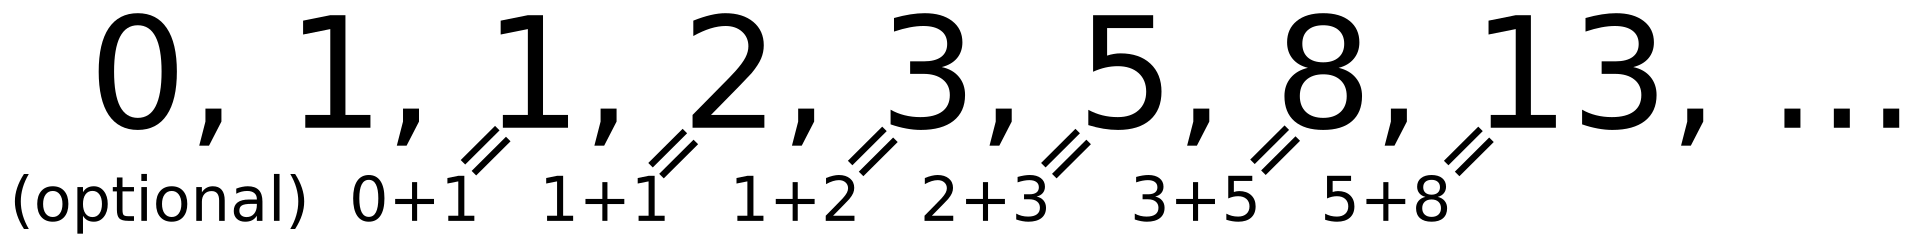  

https://de.wikipedia.org/wiki/Fibonacci-Folge

**Quelle:** https://www.python-kurs.eu/rekursive_funktionen.php

Nun kommen wir endlich wieder zu Python und den rekursiven Funktionen zurück. Die Fibonacci-Zahlen lassen sich sehr leicht als rekursive Python-Funktion realisieren. Diese spiegelt ziemlich exakt die rekursive mathematische Funktion:

In [1]:
def fib(n):
    if n == 0:                       # Abbruchbedingung 1
        return 0
    elif n == 1:                     # Abbruchbedingung 2
        return 1
    else:
        return fib(n-1) + fib(n-2)   # Rekursiver Aufruf

In [2]:
print(fib(10))

55


In [ ]:
%%writefile fibonacci.py    
# Python Datei erzeugen für weiteren Verlauf --> wird in das Verzeichnis geschrieben
""" Ein Modul, das sowohl eine rekursive als auch eine iterative Implementierung 
der Fibonacci-Funktion enthält. Der Zweck dieses Moduls besteht darin, 
die Ineffizienz einer rein rekursiven Implementierung von Fibonacci zu zeigen! """
def fib(n):
    """ rekursive Version der Fibonacci-Funktion """
    if n == 0: 
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
def fibi(n):
    """ iterative Version der Fibonacci-Funktion """
    alt, neu = 0, 1
    if n == 0:
        return 0
    for i in range(n-1):
        alt, neu = neu, alt + neu
    return neu



Zum Vergleich der Laufzeiten der verschiedenen Lösungsprogramme wird die Funktion Timer aus der timeit-Bibliothek verwendet.

In [ ]:
from timeit import Timer
#help(Timer)


In [ ]:
# rekursive gegen iterative Version der Fibonacci-Funktion
from timeit import Timer
#t1 = Timer("fib(10)","from fibonacci0 import fib")
print(f"Zähler\t| Rekursiv\t| Iterativ\t  | Verhältnis (re zu it)")
for i in range(1, 21):
    cmd = "fib(" + str(i) + ")"                  # Aufruf von fib zusammenstellen: cmd = fib(i)
#    print(cmd)
    t1 = Timer(cmd, "from fibonacci import fib")
    time1 = t1.timeit(10)                         # Zeitmessung über 10 Durchläufe
    cmd = "fibi(" + str(i) + ")"                 # Aufruf von fibi zusammenstellen: cmd = fibi(i)
#    print(cmd)
    t2 = Timer(cmd, "from fibonacci import fibi")
    time2 = t2.timeit(10)                         # Zeitmessung über 10 Durchläufe
    print(f"n={i:2d}\t| fib: {time1:8.6f} | fibi:  {time2:7.6f} | time1/time2: {time1/time2:10.2f}")

*Es ist auffällig, dass die rekursive Berechnung immer langsamer, gegenüber der iterativen, wird!*

Dabei soll diese doch so performant sein.

Woran kann dies liegen?

Schauen wir uns den Berechnungsbaum an, d.h. die Reihenfolge, in der die Funktionaufrufe erfolgen. Statt fib() schreiben wir allerdings vereinfachend f().
Zur Veranschaulichkeit haben wir hier den Berechnungsbaum für fib(5) aufgezeichnet.(vereinfacht f(n))
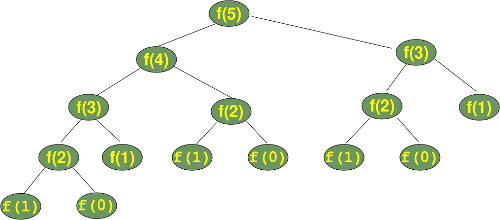
```def fib(n):
    """ rekursive Version der Fibonacci-Funktion """
    if n == 0: 
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
```

Folgen wir dem Verlauf der Berechnung, so sehen wir, dass die Berechnungen in den Unterverzweigungen für F(2) 3 mal und F(3) zweimal durchgeführt werden. 

Bei der Berechnung von fib(6) wird die Berechnung f(4) zweimal, f(3) dreimal und f(2) fünfmal durchgeführt. Dies führ dazu das bei höheren Zahlen immer mehr zusätzliche jedoch unnötige Berechnungen gemacht werden. Die geht dann massiv zu Lasten der Laufzeit.

Wenn wir einen Mechanismus implementieren, der die bereits berechneten Werte direkt aus dem Speicher holt, so kann die Berechnung um ein vielfaches schneller erfolgen.



In [ ]:
#%%writefile fibonacci0.py
""" Ein Modul, das sowohl eine rekursive als auch eine iterative Implementierung der Fibonacci-Funktion enthält.
Der Zweck dieses Moduls besteht darin, die Ineffizienz einer rein rekursiven Implementierung von Fibonacci zu zeigen! """
def fib(n):
    """ rekursive Version der Fibonacci-Funktion """
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)
    
def fibi(n):
    """ iterative Version der Fibonacci-Funktion """
    old, new = 0, 1
    if n == 0:
        return 0
    for i in range(n-1):
        old, new = new, old + new
    return new

memo = {0:0, 1:1}
def fibm(n):
    """ rekursive Fibonacci-Funktion, die zuvor berechnete Werte mithilfe eines Wörterbuch-Memos gespeichert hat"""
    if  n not in memo:
        memo[n] = fibm(n-1) + fibm(n-2)
    return memo[n]
fibl = [0,1]
def fibml(n):
    """ rekursive Fibonacci-Funktion, die zuvor berechnete Werte mithilfe eines Listen-Memos gespeichert hat"""
    if  n >= len(fibl):
        fibl.insert(n,fibml(n-1) + fibml(n-2))
    return fibl[n]


In [ ]:
print(len(fibl), fibl)
print(fibml(5), len(fibl), fibl)
print(fibml(10), len(fibl), fibl)
print(fibml(20), len(fibl), fibl)


In [ ]:
print(len(memo), memo)
print(fibm(5), len(memo), memo)
print(fibm(10), len(memo), memo)
print(fibm(20), len(memo), memo)


In [ ]:
print(len(memo))
print(memo)

In [ ]:
fibm(20)

In [ ]:
help(Timer)    #Wenn mehr Details benötigt werden

In [ ]:
### Vergleich Dictionary zu Liste
from timeit import Timer
from fibonacci0 import fib     #, fibm, fibi
for i in range(1, 51):
#for i in range(1, 301, 10):     # grösere Abstände
    t1 = Timer(f'fibm({i})',"from fibonacci0 import fibm")  # Aufruf in Funktion als String
    time1 = t1.timeit(1000)
    t2 = Timer(f'fibml({i})',"from fibonacci0 import fibml")  # Aufruf in Funktion als String
    time2 = t2.timeit(1000)
#    s = "fib(" + str(i) + ")"
#    t3 = Timer(s,fib = Fibonacci())
#    time3 = t3.timeit(10)
    print(f"n={i:2d}, fibm: {time1:8.6f}, fibml:  {time2:7.6f}, time2/time1: {time2/time1:10.3f}")

In [ ]:
from timeit import Timer
from fibonacci0 import fib     #, fibm, fibi
for i in range(1, 51):
#for i in range(1, 301, 10):     # grösere Abstände
    t1 = Timer(f'fibm({i})',"from fibonacci0 import fibm")  # Aufruf in Funktion als String
    time1 = t1.timeit(1000)
    s = "fibi(" + str(i) + ")"                              # Aufruf vorher zusammenstellen (String) 
    t2 = Timer(s,"from fibonacci0 import fibi")
    time2 = t2.timeit(1000)
#    s = "fib(" + str(i) + ")"
#    t3 = Timer(s,fib = Fibonacci())
#    time3 = t3.timeit(10)
    print(f"n={i:2d}, fibm: {time1:8.6f}, fibi:  {time2:7.6f}, time2/time1: {time2/time1:10.3f}")

Schreibe eine rekursive Version der Funktion f(n) = 3 * n, also eine Funktion, die die Vielfachen von 3 berechnet

Schreibe eine rekursive Python-Funktion, welche die Summe der ersten n ganzen Zahlen zurückliefert.
(Hinweis: Diese Funktion sieht ähnlich wie die Fakultätsfunktion aus!


In [9]:
# Überlegen Sie sich eine rekursive Version der Funktion für f(n) = 3 * n.
def mult3(n):
    if n == 1:
        return 3
    else:
        print(3 * n)
        return mult3(n-1)

In [10]:
### Hauptprogramm ###
mult3(5)

15
12
9
6
3


Schreibe eine **rekursive** Funktion, die das Pascalsche Dreick implementiert:
  
https://de.wikipedia.org/wiki/Pascalsches_Dreieck#/media/Datei:PascalTriangleAnimated2.gif

```
                1

             1    1

          1     2     1

      1     3     3     1

   1     4     6     4     1

1     5     10    10     5    1
```

In [9]:
def pascal(n):
    if n == 1:
        return [1]
    else:
        line = [1]
        previous_line = pascal(n - 1)
        for i in range(len(previous_line)-1):
            line.append(previous_line[i] + previous_line[i+1])
        line += [1]
        return line

In [10]:
### Hauptprogramm ###
try:
    r = int(input('welche zahl'))
except:
    print('richtige zahl')
for i in range(1, r + 1):
    print(f'{i:3}',f'{pascal(i)}'.replace(',','').replace('[','').replace(']','').center(100))

welche zahl 8


  1                                                  1                                                  
  2                                                 1 1                                                 
  3                                                1 2 1                                                
  4                                               1 3 3 1                                               
  5                                              1 4 6 4 1                                              
  6                                            1 5 10 10 5 1                                            
  7                                           1 6 15 20 15 6 1                                          
  8                                         1 7 21 35 35 21 7 1                                         
